<a href="https://colab.research.google.com/github/parksoyun1023/Python25study/blob/main/08_01_%ED%95%A9%EC%84%B1%EA%B3%B1%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 합성곱 https://youtu.be/lDqn1UNwgrY?si=z4lyIFOU64bgJqkE
# 입력데이터에 도장을 찍어서 유용한 특성만 드러나게 하는 것

# 전에 사용해봤던 인공지능은 밀집층에 뉴런마다 입력 개수만큼의 가중치가 있다.
# 즉 모든 입력에 가중치를 곱한다.
# 인공신경망은 처음에 가중치를 절편과 랜덤하게 초기화한 다음
# 에포크를 반복하면서 경사하강법을 사용
# 손실이 낮아질 수록 최정의 가중치와 절편을 찾아간다. (모델 훈련)

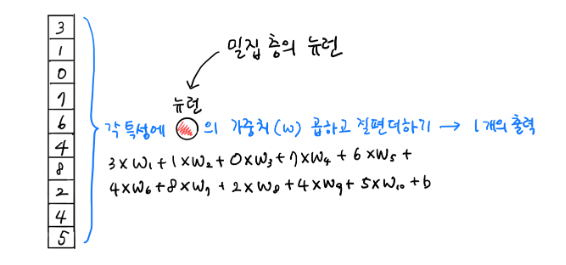

In [2]:
# 예를 들어 뉴런이 3개가 있다면 출력이 3개 임.
# 입력 개수에 상관없이 동작함
# 784개의 픽셀을 입력받는 은닉층의 뉴런이 100개임으로 출력도 100개가 됨

In [3]:
# 합성곱은 밀집층의 계산이 조금 다름
# 입력 데이터 전체에 가중치를 적용하는 것이 아니라 일부에 가중치를 곱한다.

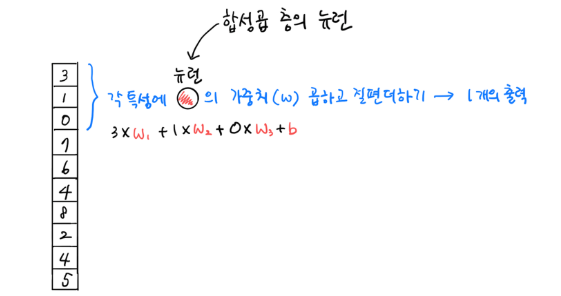

In [ ]:
# 여기에 중요한 것은 첫번째 합성곱에 사용된 가중치와
# 두번째 합성곱에서 사용된 가중치와 절편이 같다.
# 이렇게 한칸씩 아래로 이동하면서 출력을 만드는 것이 합성곱!!

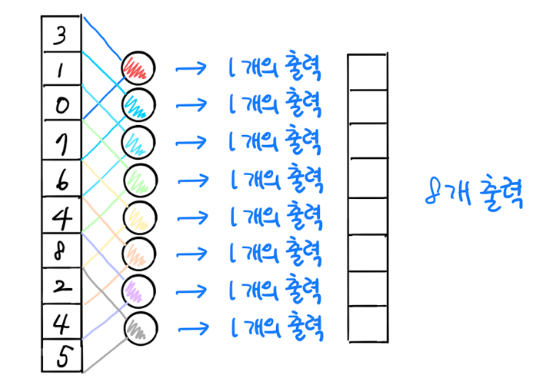

In [4]:
# 10개의 배열이 8개의 합성곱 출력으로 생성됨.

# 밀집층의 뉴런은 입력 개수만큼 10개의 가중치를 가지고 1개의 출력을 만듬.
# 합성곱 층의 뉴런은 3개의 가중치를 가지고 8개의 출력을 만듬
# 합성곱 층의 뉴런에 있는 가중치 개수는 정하기 나름이다.(커스텀 - 하이퍼파라미터)
# 이 방법은 마치 도장을 찍는 방법처럼 생각하면 쉽다.

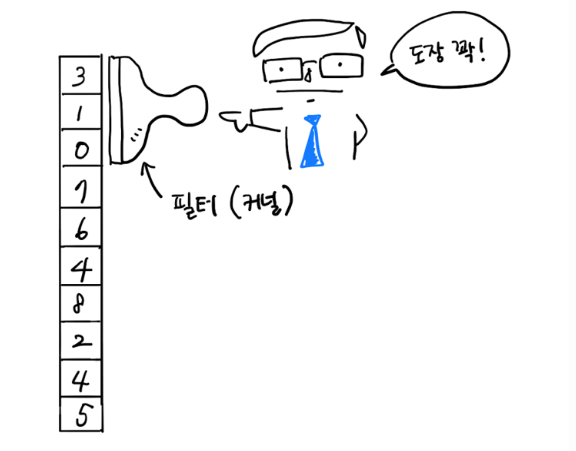

In [5]:
# 경사하강법의 신경망 층은 뉴런이 길게 늘어서 있고 서로 조밀하게 연결되어 있었음.

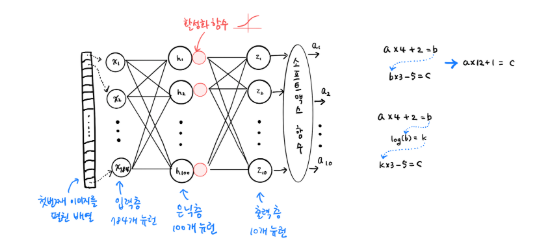

In [ ]:

# 그런데 합성곱에서의 뉴런은 입력 위를 이동하면서 출력을 만들기 때문에 위 그림처럼 표시가 힘듬.
# 이것을 뉴런이라고 부르기도 좀 애매함. -> 필터라고 부름(커널이라고도 함.)
# 합성곱 신경망(Convolutional neural network : CNN)
# https://kr.mathworks.com/discovery/convolutional-neural-network.html?gclid=Cj0KCQiA0MG5BhD1ARIsAEcZtwQYUQnRVLKQ8-WwcDHni0Fi-fO7gt9oWBJy6lyW4hk7TOBMM55mIdEaAu8bEALw_wcB&ef_id=Cj0KCQiA0MG5BhD1ARIsAEcZtwQYUQnRVLKQ8-WwcDHni0Fi-fO7gt9oWBJy6lyW4hk7TOBMM55mIdEaAu8bEALw_wcB:G:s&s_kwcid=AL!8664!3!650716963097!p!!g!!convolutional%20neural%20network&s_eid=psn_136154680972&q=convolutional+neural+network&gad_source=1

# 케라스 API와 이름을 맞추어 뉴런 개수를 이야기할 때 필터 (뉴런 개수를 표현)
# 입력에 곱해지는 가중치를 의미할 때는 커널이라고 함 (입력에 곱하는 가중치)

# 합성곱의 장점은 1차원이 아니라, 2차원에도 적용

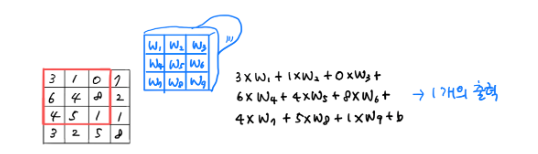

In [6]:
# 위 그림을 보면 입력이 2차원 배열이면 필터(도장)도 2차원 이어야 함
# 위 그림에서 이 필터의 커널 크기는 3*3(하이퍼파라미터) 으로 가정하고
# 왼쪽 위 모서리부터 합성곱을 시작
# 입력의 9개 원소와 커널의 9개 가중치를 곱한 후 절편을 더하고 1개의 출력을 만듬

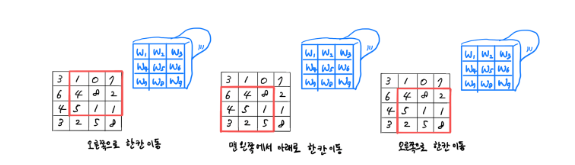

In [7]:
# Z 방향으로 합성곱을 수행
# 마치 도장을 찍듯이 계산하여 출력을 만듬.
# 계산식은 밀집층과 크게 다르지 않다. -> 입력과 가중치의 행과 열을 맞추어 곱하고 모두 더함
# 총 4개의 출력을 만듬 -> 특성 맵

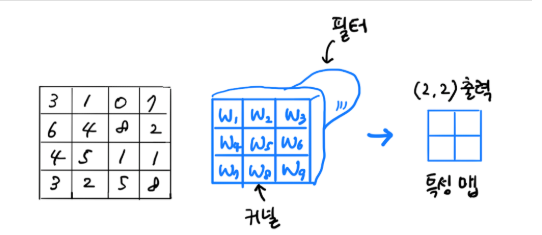

In [8]:
# 이때 4개의 출력을 필터가 입력에 놓은 위치에 맞게 2차원으로 배치함
# 즉 왼쪽 위, 오른쪽 위, 왼쪽아래, 오른쪽 아래 모두 4개의 위치에 해당 값을 놓음
# 이렇게 2차원으로 표현하면 (4,4) 크기의 입력을 (2,2) 크기로 압축한 느낌이다.
# 합성곱 계산을 통해 얻은 출력을 특성맵, 피처맵(feature map)이라고 함.

# 밀집층에서 여러개의 뉴런을 사용하듯이 합성곱 층에서도
# 여러개 필터를 사용 하나만 사용할 이유가 없다.
# 여러개의 필터를 사용하면 만들어진 특성 맵은 순서대로 차곡 차곡 쌓인다.
# 3차원 배열 (2,2,3) 크기

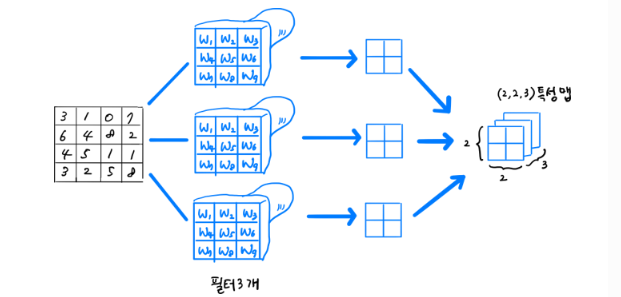

In [9]:
# 밀집층에 있는 뉴런의 가중치가 모두 다르듯이 합성곱 층에 있는 필터의 가중치(커널)도 모두 다름
# 같은 가중치를 가진 필터를 여러개 사용할 이유가 없다.

# 결론 : 실제 계산은 밀집층과 동일하게 단순히 입력과 가중치를 곱하는 것이지만
#        2차원 형태를 유지하는 점이 다름

# 또 입력보다 훨씬 작은 크기의 커널을 사용하고 입력 위를 왼쪽에서 오른쪽으로
# 위에서 아래로 이동하면서 2차원 특성 맵을 만듬

# 이렇게 2차원 구조를 그대로 사용하기 때문에 합성곱 신경망이
# 이미지 처리 분야에서 뛰어난 성능을 발휘함

In [10]:
# 케라스 합성곱 층 테스트

# 케라스의 층은 모두 keras.layers 패키지 아래 클래스로 구현되어 있음(합성곱 층도 마찬가지임)
# 특별히 입력 위 (왼쪽에서 오른쪽으로, 위에서 아래도) 이동하는 합성곱은 Conv2D 클래스로 제공함

from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu')
#                   10 필터(즉 도장!)의 개수
#                       커널 사이즈(3*3)
#                                           활성화 함수(렐루)

# 특성맵은 활성화 함수 적용 후에 사용함
# 완전 연결 신경망에서처럼 합성곱 신경망에서도 종종 활성화 함수를 언급하지 않음
# 일반적으로 특성 맵은 활성화 함수를 통과한 값을 나타냄
# 합성곱에서는 활성화 출력이란 표현을 잘 쓰지 않음

# 커널의 크기는 하이퍼파라미터로 대부분 3*3 이나 5*5 크기가 권장됨
# 케라스 API의 합성곱 층은 Dense층을 사용했던 자리에 대신 Conv2D 층을 넣음

# 합성곱 신경망의 정의
# 일반적으로 1개 이상의 합성곱 층을 쓴 인공신경망
# 즉, 합성곱 층만 사용한 신경망을 합성곱 신경망이라고 부르지 않음.

<Conv2D name=conv2d, built=False>

In [11]:
# 패딩 : 바깥쪽 여백을 만듬

# 앞에 예를 들어 합성곱 계산은 (4,4) 크기의 입력에 (3,3) 크기의 커널을 적용하여
# (2,2) 크기의 특성 맵을 만들었음

# 만약 커널크기는 (3,3)으로 그대로 두고 출력의 크기를 입력과 동일하게 (4,4)로 만들고 싶을 때
# 입력과 동일한 크기의 출력을 만들려면 마치 더 큰 입력에 합성곱인 척 해야 함
# 예를 들어 실제 입력 크기는 (4,4)이지만 (6,6)처럼 다룬다고 가정 해보자.

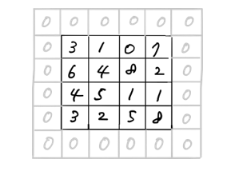

In [12]:
# 위 그림과 같이 (6,6) 크기이면 (3,3) 크기의 합성곱을 했을 때 출력의 크기는?

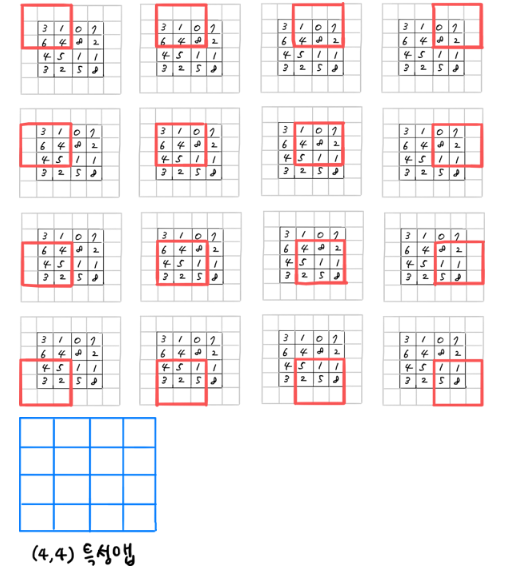

In [13]:
# (3,3) 커널로 도장을 찍으면 출력의 크기가 (4,4)가 되는 것임
# 이렇게 배열의 주위를 가상의 원소로 채우는 것을 패딩이라고 함 (실제 값이 아니기 때문에 0으로 채움)
# 즉 (4,4) 크기의 입력에 0을 1개 패딩 하면 (6,6) 크기의 입력이 됨
# 패딩의 역할은 순전히 커널이 도장을 찍을 횟수를 늘려주는 것!
# 실제로 0 값이 채워지기에 계산에 영향을 미치치 않음.
# 이렇게 입력과 특성 맵의 크기를 동일하게 만들어 주기 위해 입력 주위를 0으로 패딩하는 것을
# 세임 패딩(padding='same') 이라고 부름 (입력과 특성 맵의 크기를 동일하게 만듬)

# 밸리드 패딩(padding='valid' 기본값)
# 패딩없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만듬
#   -> 특성 맵의 크기가 줄어 들 수 밖에 없음

# 합성곱에서 패딩을 주로 사용하는 이유는 만약 패딩이 없다면
# 위에서 처럼 (4,4) 크기의 입력에 패딩없이 합성곱을 한다면
# 왼쪽 위 모서리에 3은 커널 도장에 딱 한번 찍힘(나머지 모서리도 마찬가지)

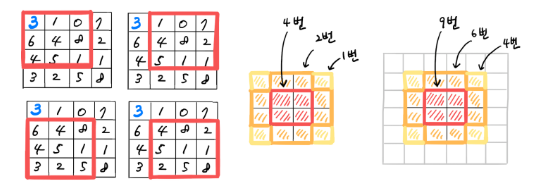

In [16]:
# 반면 다른 원소들은 2번 이상 커널과 계산됨
# 가운데있는 4,8,5,1 값은 4번 계산됨 (가운데 값이 두드러짐)
# 패딩을 하지 않을 경우 중앙부와 모서리 픽셀이 합성곱에 참여하는 비율은 크게 차이남 (4:1)
# 1픽셀을 패딩하면 (9:4)
# 만약 2픽셀을 패딩하면 중앙부와 모서리 픽셀이 합성곱에 참여하면 (1:1) 비율로 동일 해짐.

keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')

<Conv2D name=conv2d_3, built=False>

In [14]:
# 스트라이드(stride) : 합성곱 연산은 좌우, 위아래 한칸씩이 기본값이지만
# 두칸씩 이동할 수도 있는 방법(특성맵의 크기가 작아짐)
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)
#                                                                     strides=2로 사용할 일은 없다.


<Conv2D name=conv2d_1, built=False>

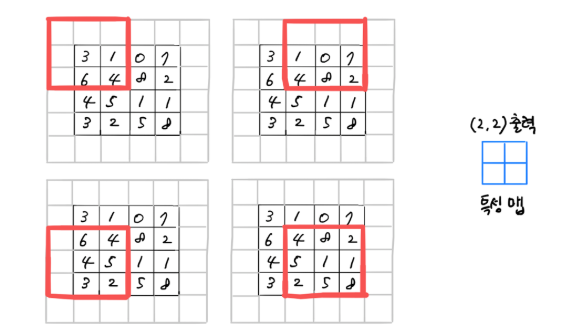

In [17]:
# 풀링(pooling) : 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 수행
#   -> 하지만 특성맵의 개수는 줄이지 않음
# 풀링은 특성 맵에 커널 없는 필터를 적용하는 것과 비슷하게 생각할 것

# 예를 들면 (2,2,3) 크기의 특성 맵에 풀링을 적용하면
# 마지막 차원인 개수는 그대로 유지하고 너비와 높이만 줄어들어 (1,1,3) 크기의 특성 맵이 됨

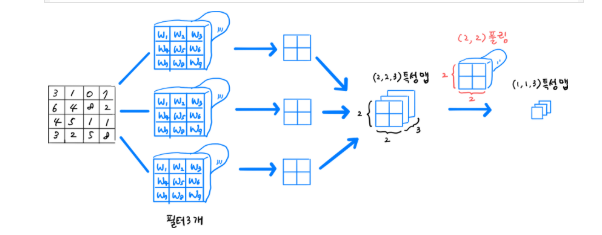

In [18]:
# 풀링도 합성곱처럼 입력 위를 지나가면서 도장을 찍는다. (위 그림은 (2,2) 크기로 풀링 함)
# 풀링에는 가중치가 없기 때문에 도장을 찍은 영역에서
# 가장 큰 값을 고르거나(최대 풀링) 평균값(평균 풀링)을 계산함
# 풀링은 합성곱 층과 뚜럿이 구분 되기 때문에 풀링 층이라고 부름

# 예를 들어 (4,4) 크기의 특성 맵이 있다고 가정해보자.
# 여기에 (2,2) 최대(max) 풀링을 적용하면 절반으로 크기가 줄어든다.

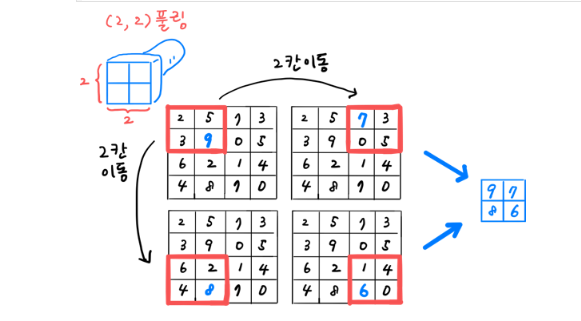

In [19]:
# 최대 풀링은 가장 큰 값을 고르기 때문에 첫번째 9, 두번째 7, 세번째 8, 네번째 6을 차례대로 골라
# (2,2) 크기의 출력을 만듬.

# 특성 맵이 여러개라면 동일한 작업을 반복함 (10개의 특성 맵이 있다면 풀링을 거친 특성 맵도 10개)
# 풀링 영역이 두칸씩 이동을 함 -> 겹침 없이 이동(합성 곱에서 커널이 한칸씩 이동했기 때문에
#                                 겹치는 부분이 있었다.)
# 풀링 크기가 (2,2)면 2칸씩 이동, (3,3)이면 3칸씩 이동

# 풀링은 가중치가 없고 풀링 크기와 스트라이드가 같기 때문에 이해하기 쉽다. (패딩도 없다)
keras.layers.MaxPooling2D(2) # 대부분 풀링의 크기는 2 (가로 세로 크기를 절반으로 줄임)

# 합성곱 층과 마찬가지로 strides와 padding 매개변수를 제공함
# strides의 기본값은 자동으로 풀링의 크기이므로 따로 지정 하지 않음
# padding의 기본값은 valid로 패딩을 하지 않음

keras.layers.MaxPooling2D(2, strides=2, padding="same") # 최대 풀링 코드
# 대부분 최대 풀링을 많이 사용한다.

keras.layers.AveragePooling2D(2, strides=2, padding="valid") # 평균 풀링 코드
# 평균풀링은 특성 맵에 있는 중요한 정보를 평균을 내어 희석시킬 수 있기 때문

# keypoint : 풀링은 가로 세로 방향만 진행한다.(특성 맵의 개수는 변하지 않고 그대로)

<AveragePooling2D name=average_pooling2d, built=True>

In [20]:
# 합성곱 신경망의 전체 구조

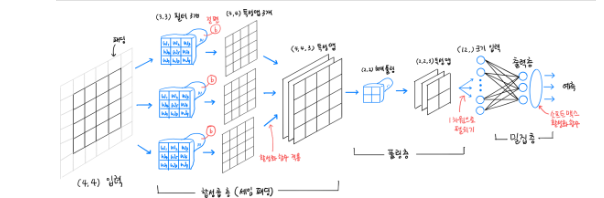

In [21]:
# 1. (4,4) 입력값에 패딩 1을 적용
# 2. 합성곱 에서 사용할 커널의 크기는 (3,3) 크기이고 세임 패딩이 1이므로 1픽셀이 입력 데이터 주변에 추가
# 3. 이때 패딩은 텐서 플로에서 자동으로 추가하므로 수동으로 입력에 어떤 작업을 추가할 필요가 없음
# 4. 패딩이 추가된 입력에서 합성곱이 수행됨

# 5. 합성곱의 필터는 3개임 (각각 3,3 크기의 가중치를 가지고 있으며 필터마다 절편이 하나씩 있음)
# 6. 밀집층의 뉴런과 마찬가지로 필터의 가중치는 각기 서로 다름, 합성곱의 스트라이드는 항상 1
# 7. 만들어지는 특성 맵의 크기는 입력과 동일한 (4,4), 3개의 필터가 하나씩 합성곱의 출력을 만들고
#    이 출력이 합쳐져서 (4,4,3)크기의 특성맵 생성
# 8. 밀집층과 마찬가지로 합성곱 층에서도 활성화 함수를 적용함(합성곱의 활성화 함수로 렐루사용)

# 9. 풀링층은 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄입
# 10. 보통 (2,2) 풀링을 사용해서 절반으로 줄임 (특성 맵의 개수는 변하지 않음 (2,2,3))
# 10-1. 풀링을 사용함년 합성곱에서 스트라이드를 크게하여 특성 맵을 줄이는 것보다
#       풀링 층에서 크기를 줄이는 것이 더 나은 성능임

# 11. 밀집층인 출력층에서 전달하려면 3차원 배열을 1차원 배열로 펼쳐야 함(Flatten 클래스)
#     -> 12개의 원소를 가진 1차원 배열이고 출력층의 입력이 됨
# 12. 3개의 뉴런을 두었고 (3개의 클래스를 분류하는 다중분류
#     -> 출력층에서 계산된 값은 소프트맥스 활성화 함수를 거침) -> 최종 예측 확률이 됨


In [ ]:
# 컬러이미지 인 경우!!!
# 컬러인 경우에는 RGB(빨,녹,파)채널로 구현되어 있음
# 하나의 컬러 이미지는 너비와 높이 차원 이외에 깊이 차원(채널 차원)이 있다. (4,4,3)이 되는 것!
# -> 마지막 3이 깊이